In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

In [2]:
background = np.load("background.npy")
wine_glass = np.load("wineglass.npy")

## def process_image

A value of 0 is black.  
A value of 255 is white.

In [4]:
def process_image(frame):
    """Standard method of processing images for Sketch It"""
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame_gray_blur = cv2.GaussianBlur(frame_gray, (5,5),0)
    return(frame_gray_blur)

unprocessed shape: 
 (1080, 1920, 3)
processed shape: 
(1080, 1920)
processed values: 
[[131 131 130 ... 171 171 171]
 [131 131 130 ... 171 171 171]
 [131 131 131 ... 171 171 171]
 ...
 [ 22  22  22 ...   8   8   8]
 [ 22  22  22 ...   8   8   8]
 [ 22  22  22 ...   8   8   8]]


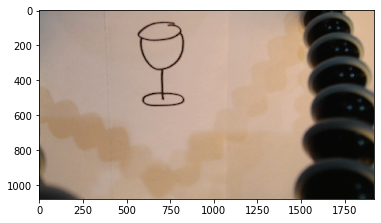

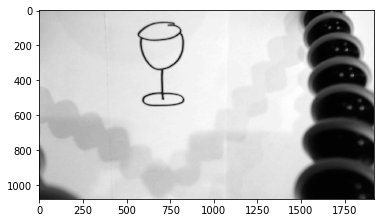

In [5]:
plt.figure()
plt.imshow(wine_glass)
print(f'unprocessed shape: \n {wine_glass.shape}')
plt.figure()
processed_wine_glass = process_image(wine_glass)
plt.imshow(processed_wine_glass, cmap = 'gray')
print(f"processed shape: \n{processed_wine_glass.shape}")
print(f"processed values: \n{processed_wine_glass}")

# crop image

In [47]:
def crop_image(frame):
    img = processed_wine_glass

    y = 0
    x = 400
    w = 600
    h = 600
    crop_img = frame[y:y+h, x:x+w]
    return(crop_img)

# contour preprocessing

In [113]:
def contour_preprocessing(frame, background_processed):
    """Preprocessing image to find contours"""

    #find the absolute difference between current frame and background frame
    frame = cv2.absdiff(background_processed,frame)

    #create a threshold to make the image black or white
    thresh = cv2.threshold(frame, 50, 255, cv2.THRESH_BINARY)[1]

    #dilate to increase thickeness of contours
    dilate = cv2.dilate(thresh, None, iterations = 8)

    return(dilate)

In [114]:
processed_wine_glass = process_image(wine_glass)
processed_background = process_image(background)
contour_image = contour_preprocessing(processed_wine_glass, processed_background)


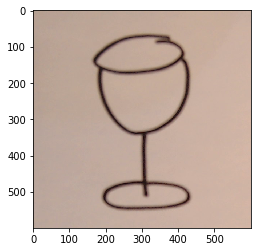

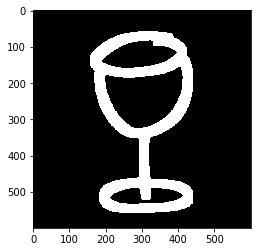

In [115]:
plt.figure()
plt.imshow(crop_image(wine_glass))
plt.figure()
plt.imshow(crop_image(contour_image), cmap = 'gray')


## Resize using cv2

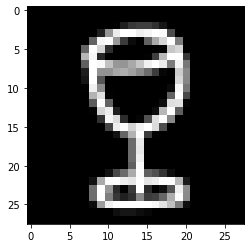

In [116]:
cropped = crop_image(contour_image)
resized = cv2.resize(cropped, (28,28), interpolation = cv2.INTER_AREA)

plt.imshow(resized, cmap = 'gray')

## Resize using PIL

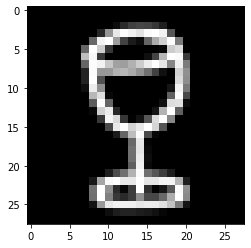

In [117]:
resized_pil = Image.fromarray(cropped)
resized_pil = np.array(resized_pil.resize((28,28), Image.BICUBIC))
plt.imshow(resized_pil, cmap = 'gray')